# Analytical diffusion

## Question 1

Let's break down the [problem statement](0.Kinetics_Module_Problems.ipynb) for question **1**:

## Declare simulation parameters

**note:**
- Distances are in micrometers
- Diffusion coefficient `DP` is in micrometers squared per second
- Times are in seconds

> The concentration of B in the wafer is $2\times 10^{17} / \mathrm{cm^3} = 2\times 10^5/\mathrm{\mu m^3}$.

In [1]:
CB = 2e5 # Bulk concentration of boron

> P diffusivity in this system at this condition is $D_P\approx 10^{-14}~\mathrm{cm^2/s} = 10^{-6}~\mathrm{\mu m^2/s}$.

In [2]:
DP = 1.0e-6 # Diffusion coefficient

> Assume that the concentration of P at the surface in this case is $10^{21}/\mathrm{cm^3} = 10^9/\mathrm{\mu m^3}$.

In [3]:
CPsurf = 1.0e9 # Surface concentration of phosphorus

> To fabricate a device with a junction at approximately $1~\mathrm{\mu m}$ from the surface, one would like to match the P and B concentrations at a depth of $1~\mathrm{\mu m}$.

In [4]:
junction_depth = 1.0 # Distance at which we will output concentration

> Using the following analytical formula, determine the concentration of P at a distance $x=1~\mathrm{\mu m}$ from the surface to be equal to the concentration of B. 
$$C_P(x, t) = C_{P,\text{surface}} \left(1 - \mathrm{erf} \frac{x}{2\sqrt{D_P t}}\right)$$
> 
> **Note:** The `erf` function and its inverse can be evaluated using SciPy or Excel (you can also consider using the complementary error function, `erfc`, which is one minus the error function).

In [5]:
from scipy.special import erf, erfc

def analytical(x, t):
    return CPsurf * (1 - erf(x / (2 * np.sqrt(DP * t))))

def analyticalc(x, t):
    return CPsurf * erfc(x / (2 * np.sqrt(DP * t)))

## Graphical approach

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
t = np.linspace(0, 40000)
CB_t = np.copy(t)
CB_t[:] = CB

/tmp/ipykernel_14681/4116069757.py:4: RuntimeWarning: divide by zero encountered in divide
  return CPsurf * (1 - erf(x / (2 * np.sqrt(DP * t))))


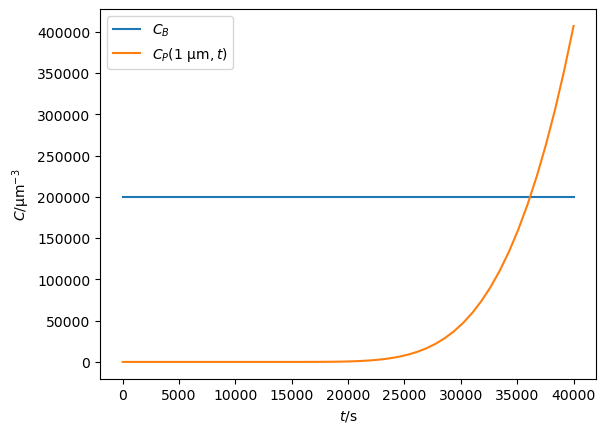

In [8]:
plt.plot(t, CB_t, label=r"$C_B$")
plt.plot(t, analytical(junction_depth, t), label=r"$C_P(1~\mathrm{\mu m}, t)$")
plt.xlabel(r"$t / \mathrm{s}$")
plt.ylabel(r"$C / \mathrm{\mu m}^{-3}$")
_ = plt.legend()

### Zoom and enhance

In [9]:
t_zoom = np.linspace(35000, 37000)
CB_t_zoom = np.copy(t_zoom)
CB_t_zoom[:] = CB

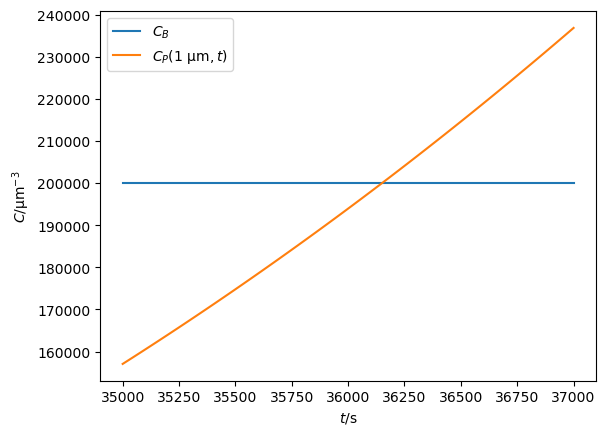

In [10]:
plt.plot(t_zoom, CB_t_zoom, label=r"$C_B$")
plt.plot(t_zoom, analytical(junction_depth, t_zoom), label=r"$C_P(1~\mathrm{\mu m}, t)$")
plt.xlabel(r"$t / \mathrm{s}$")
plt.ylabel(r"$C / \mathrm{\mu m}^{-3}$")
_ = plt.legend()

## Analytical approach

Invert the analytical function to find the $t$ that gives a concentration $C_P(1~\mathrm{\mu m}, t) = C_B$

\begin{align}
C_P(x, t) &= C_{P,\text{surface}} \left(1 - \mathrm{erf} \frac{x}{2\sqrt{D_P t}}\right)
\\
\frac{C_P(x, t)}{C_{P,\text{surface}}} &= 1 - \mathrm{erf} \frac{x}{2\sqrt{D_P t}}
\\
1 - \frac{C_P(x, t)}{C_{P,\text{surface}}} &= \mathrm{erf} \frac{x}{2\sqrt{D_P t}}
\\
\mathrm{erf}^{-1}\left(1 - \frac{C_P(x, t)}{C_{P,\text{surface}}}\right) &= \frac{x}{2\sqrt{D_P t}}
\\
\sqrt{t} &= \frac{x}{2\sqrt{D_P}\mathrm{erf}^{-1}\left(1 - \frac{C_P(x, t)}{C_{P,\text{surface}}}\right)}
\\
t &= \frac{x^2}{4 D_P \left[\mathrm{erf}^{-1}\left(1 - \frac{C_P(x, t)}{C_{P,\text{surface}}}\right)\right]^2}
\end{align}

In [11]:
from scipy.special import erfinv

print(f"t = {junction_depth**2 / (4 * DP * erfinv(1 - CB/CPsurf)**2)} s")

t = 36150.4574601689 s


Invert the analytical function to find the $t$ that gives a concentration $C_P(1~\mathrm{\mu m}, t) = C_B$

\begin{align}
C_P(x, t) &= C_{P,\text{surface}} \mathrm{erfc} \frac{x}{2\sqrt{D_P t}}
\\
\frac{C_P(x, t)}{C_{P,\text{surface}}} &= \mathrm{erfc} \frac{x}{2\sqrt{D_P t}}
\\
\mathrm{erfc}^{-1}\frac{C_P(x, t)}{C_{P,\text{surface}}} &= \frac{x}{2\sqrt{D_P t}}
\\
\sqrt{t} &= \frac{x}{2\sqrt{D_P}\mathrm{erfc}^{-1}\frac{C_P(x, t)}{C_{P,\text{surface}}}}
\\
t &= \frac{x^2}{4 D_P \left(\mathrm{erfc}^{-1}\frac{C_P(x, t)}{C_{P,\text{surface}}}\right)^2}
\end{align}

In [12]:
from scipy.special import erfcinv

print(f"t = {junction_depth**2 / (4 * DP * erfcinv(CB/CPsurf)**2)} s")

t = 36150.45746016944 s
